<a href="https://colab.research.google.com/github/HKang42/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Harrison_Kang_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [17]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset

# drop the id and unnamed columns
df = df.drop(['id', 'Unnamed: 32'], axis = 1)

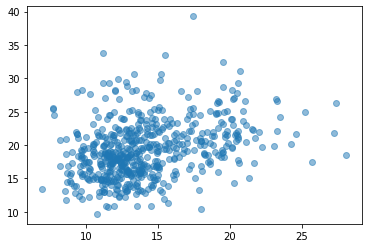

In [19]:
# let's do a scatter plot on radius and texture to get an idea of what k should be

plt.scatter( df['radius_mean'], df['texture_mean'], alpha = 0.5)

plt.show()

In [20]:
# It looks like there are roughly 2 clusters, so I'll set k=2

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

print("Here are our clustered observations\n")
kmeans.labels_

Here are our clusterd observations



array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

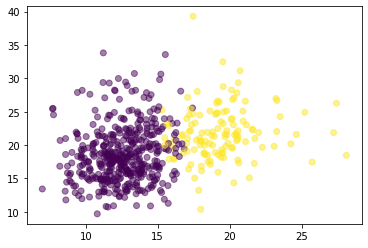

In [21]:
# Let's visualize our result

plt.scatter( df['radius_mean'], df['texture_mean'], alpha = 0.5, c = kmeans.labels_)

plt.show()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here
diagnosis = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv", usecols=['diagnosis'])

diagnosis['num'] = diagnosis['diagnosis']

diagnosis['num'] = diagnosis['num'].replace({'M' : 1, 'B' : 0})

In [23]:
# Create a series of same length as diagnosis and kmeans. Each element is True when diagnosis matches the kmeans label. 
# Get value counts to check for correct clustering

# REMEMBER THAT THE 0 AND 1 VALUES FOR KMEANS MIGHT FLIP IF IT IS RE-CREATED

compare =  (diagnosis['num'] == kmeans.labels_)

correct =  compare.value_counts()[1]

print ('The percent of correct guesses is:', round( (correct / compare.shape[0]),4) * 100 , '%' )

The percent of correct guesses is: 85.41 %


Clustering using k-Means


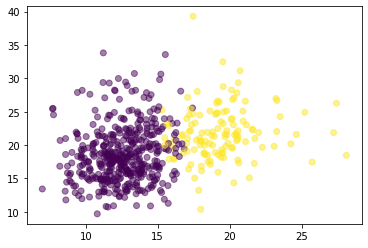

In [24]:
print('Clustering using k-Means')

fig, ax= plt.subplots()

color_guide = kmeans.labels_

ax = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = color_guide)

True Clustering


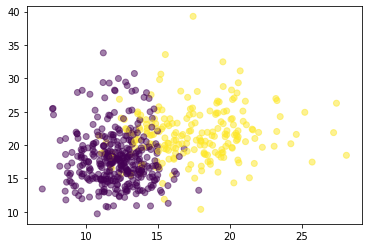

In [25]:
print('True Clustering')

fig, ax= plt.subplots()

color_guide = diagnosis['num']

ax = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = color_guide)

In [0]:
"""
fig = plt.figure()
ax1 = fig.subplots(2)
ax2 = fig.subplots(2)

ax1 = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = kmeans.labels_)

ax2 = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = diagnosis['num'])
"""

In [0]:
"""
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0] = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = kmeans.labels_)
axs[1] = plt.scatter(df['radius_mean'], df['texture_mean'], alpha = 0.5, c = diagnosis['num'])
"""

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [28]:
##### Your Code Here #####

# standardize our data

scaler = StandardScaler()
Z = scaler.fit_transform(df)
Z

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [29]:
# run the PCA
pca = PCA()

pca_features = pca.fit_transform(Z)

pca_features

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

In [42]:
pca_kmeans = KMeans(n_clusters = 2)
pca_kmeans.fit(pca_features)

print("Here are our clustered observations using PCA data\n")
pca_kmeans.labels_

Here are our clustered observations using PCA data



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
# convert to DataFrame so we can easily plot the first 2 columns
pca_df = pd.DataFrame(pca_features)
#pca_df

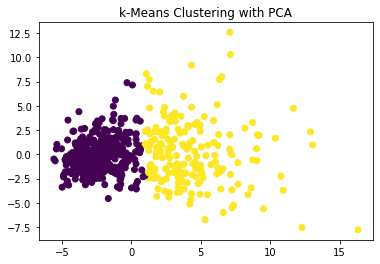

In [44]:
# plot our 2 columns

fig, ax = plt.subplots()

plt.scatter(pca_df[0], pca_df[1], c = pca_kmeans.labels_)

ax.set_title('k-Means Clustering with PCA')

plt.show()

**Use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset**

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

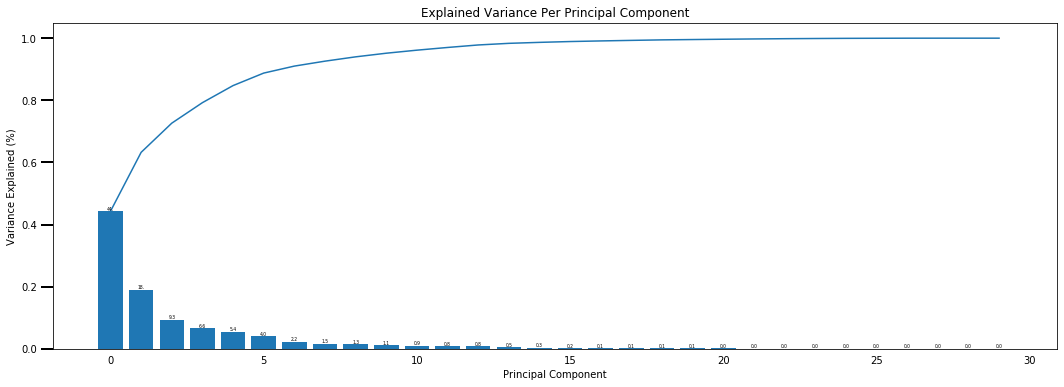

In [47]:
scree_plot(pca)

In [52]:
# Looks like I need about 7 columns to get 90% of the explained variance

pca = PCA(7)

pca_90 = pca.fit_transform(Z)

pca_90

array([[ 9.19283683,  1.94858307, -1.12316615, ..., -1.19510992,
         1.41142385,  2.15938421],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.62177514,
         0.0286564 ,  0.01335398],
       [ 5.73389628, -1.07517379, -0.55174761, ..., -0.17708606,
         0.5414526 , -0.6681776 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  1.80999147,
        -0.53444739, -0.19275571],
       [10.37479406,  1.6720101 , -1.87702931, ..., -0.03374174,
         0.56793581,  0.22309634],
       [-5.4752433 , -0.67063679,  1.49044309, ..., -0.18470316,
         1.61783684,  1.69896226]])

In [0]:
pca_90_kmeans = KMeans(n_clusters = 2)
pca_90_kmeans.fit(pca_90)

print("Here are our clustered observations using PCA data with 90% retained variation\n")
pca_90_kmeans.labels_

In [0]:
# convert to DataFrame so we can easily plot the first 2 columns
pca_90_df = pd.DataFrame(pca_90)


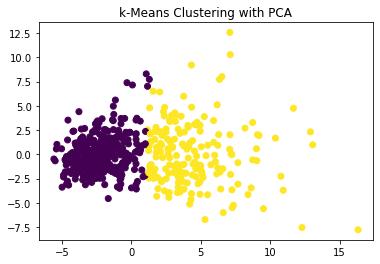

In [57]:
# plot our 2 columns

fig, ax = plt.subplots()

plt.scatter(pca_90_df[0], pca_90_df[1], c = pca_90_kmeans.labels_)

ax.set_title('k-Means Clustering with PCA')

plt.show()

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [59]:
# Copy and pasted code from the first time we checked accuracy
compare =  (diagnosis['num'] == kmeans.labels_)

correct =  compare.value_counts()[1]

print ('The percent of correct guesses is:', round( (correct / compare.shape[0]),4) * 100 , '% for k-Means clustering without treating data.' )

The percent of correct guesses is: 8.959999999999999 % for k-Means clustering without treating data.


In [61]:
# Code for PCA-treated data
compare =  (diagnosis['num'] == pca_kmeans.labels_)

correct =  compare.value_counts()[1]

print ('The percent of correct guesses is:', round( (correct / compare.shape[0]),4) * 100 , '% for k-Means clustering with PCA-treated data.' )

The percent of correct guesses is: 90.51 % for k-Means clustering with PCA-treated data.


In [63]:
# Copy and pasted code from the first time we checked accuracy
compare =  (diagnosis['num'] == pca_90_kmeans.labels_)

correct =  compare.value_counts()[1]

print ('The percent of correct guesses is:', round( (correct / compare.shape[0]),4) * 100 , '% for k-Means clustering with PCA-treated data (90% retained).' )

The percent of correct guesses is: 91.21000000000001 % for k-Means clustering with PCA-treated data (90% retained).


# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project